# Exploratory Analysis Report of Salary for the NBA 2022-23 Season

##### Ryan Hargreaves, August 2023

## Executive Summary:

Salary values within the NBA have a shocking range, from nearly 50 million USD per year down to just under 60 thousand USD per year.  The statistic most closely associated with a player's salary is their PPG (points per game), however the weighting is not equal across all positions. The Center position has the highest correlation with salary weighing in at .81.  Although the outrageous contracts such as Stephen Curry's 4 years 215 million dollar contract make news headlines, over half the league makes less than 4.5 million per year. As players have begun to emphasize their health and longevity, some players are able to continue their high level of play well in to their thirties, allowing them to sign multiple large contracts over their career. LeBron James is a blueprint example of this, but players like Stephen Curry and Kevin Durant are less athletically blessed players can keep up their high level of play as time goes on as well.  Any player looking to increase their salary should look to improve their scoring from any range, 2PT, 3PT, or FT. Efficiency has been the hallmark of the modern NBA, but salaries do not seem to reflect that as much as pure scoring is.  General Managers wanting to get the best value for their money will want to think about engaging in early negotations of extensions if a player is showing promising scoring talent.  As well, GMs can rest easier signing an "older" player to a big or longer contract, as it looks that on average players are able to continue to produce at a high level than in years prior, so long as the player remains relatively injury free.

## Table of Contents
 #### - Executive Summary
 #### - Introduction
 #### - Analysis
 #### - Key Findings
 #### - Conclusion
 #### - Appendix

## Introduction

The NBA has been making headlines for years with the enormous contracts that superstars such as LeBron James, Stephen Curry, and Kevin Durant have received.  Many of these contracts are in excess of 40 million USD per *year*, and thanks to the prosperity of the league the contracts only show signs of growing. Just this summer, Jaylen Brown signed a 5 year 304 million dollar contract, making him the highest paid player in the league annually. But while the star players watch their salaries skyrocket, what about the rest of the league?  This report aims to have a look at salaries across the league for the 2022-23 season and reveal insights such as who is getting paid the most/least, which positions are getting paid the most/least, which stats correlate the most with salary, and other things either interesting or important. These findings will help determine which statistics and qualities could be important for a player looking to increase their own paycheque, and which things general managers will want to monitor to try and either re-sign players for a team friendly deal, or trade for players who might overproduce based on the salary they currently have.

## Data Description

The data chosen for this analysis is the basic totals, per game, and salary statistics from the 2022-23 season. Two tables were taken from www.basketball-reference.com, and combined to create a table with a players total stats for the year, some created statistics for their 'per game' numbers, and finally their salary.

Some players had recorded statistics but no recorded salary, these data entries were verified and removed where applicable.  Not every player in the NBA is paid by the NBA, as there are players on what is known as a 2-Way contract with the NBA affiliated G-League.  As well, there are players that were on 10 day contracts or bought out (also known as waived).  Not all salary data is published and known like that stats are recorded, so for the analysis those players aren't included in the analysis.

Despite this, the dataset is still roughly 450 entries long, and it is commonly said that the league consists of roughly 450 players, so we feel confident in saying that our analysis is a large and accurate sample of the true population of players who saw the NBA floor in 2022-23.

## Data Exploration

In [263]:
import plotly.express as px
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats

#this is a dummy df to get the cells to recognize the variabl
df = pd.DataFrame()

#dummy variables
salaryCorr = pd.DataFrame()
side_by_side = None
outliers = pd.DataFrame()

#run external script
%run -i ../scripts/SalaryAnalysis.py

#setting max columns
pd.set_option('display.max_columns', None)

### Univariate Analysis:
Present key summary statistics, including measures of central tendency and dispersion, for each variable. Accompany the statistics with well-designed histograms or box plots.

The first thing we'll do for this analysis is get some basic measure with which we can use to better understand the data as we explore it.

In [264]:
#Define custom formatting function, move this to analysis file?
def format_with_commas(value):
    return f'{value:,.2f}'

# Apply formatting to DataFrame
central_tendencies = df.describe().applymap(format_with_commas)
central_tendencies[['salary']].T

,count,mean,std,min,25%,50%,75%,max
salary,464.00,"9,485,579.85","10,808,855.23","58,493.00","1,958,801.50","4,580,760.00","12,622,500.00","48,070,014.00"


We have 464 players in our dataset, with a mean salary of \$9.48 million. Our lowest salary is a paltry \$58 thousand, our maximum is a colossal \$48 million, and our median salary rests at  `\$`4.58 million. For now we will withold any judgments on the data and proceed to keep these values in mind.

Something we are immediately interested in is who made the most this year, and who made the least?

In [265]:
# Perform the query to filter the DataFrame based on salary condition and select columns
max = df.query('salary in [salary.min(), salary.max()]')[['Age', 'G', 'PPG', 'TRPG', 'APG', 'salary']]

# Round the specified columns to two decimal places
columns_to_round = ['APG', 'TRPG', 'PPG']
max[columns_to_round] = max[columns_to_round].round(1)


# Format the 'salary' column with a dollar sign and commas for thousands
max['salary'] = max['salary'].apply(lambda x: '${:,}'.format(x))

# Print the formatted result
max


,Age,G,PPG,TRPG,APG,salary
Player,,,,,,
Stephen Curry,34,56,29.4,6.1,6.3,"$48,070,014"
Stanley Umude,23,1,2.0,0.0,0.0,"$58,493"


Unsurprisingly the top salary is the household name Stephen Curry, coming in at 48 million a year. This is an insane amount of money for one year, but considering the player's popularity and ability it would make sense that he's the top earner in the league.  What is surprising here is the lowest salary held by Stanley Umude at only 58 thousand dollars.  It's commonly believed that all professional athletes must be millionaires, and although we cannot speculate on Mr.Umude's total net worth, 58 thousand annually is a shockingly low number to be paid to play any sport at the highest level.

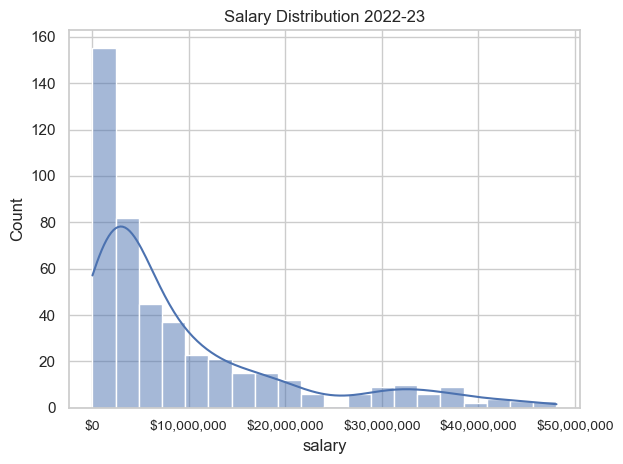

In [266]:
ax = sns.histplot(data = df, x='salary', kde=True, bins = 20)
ax.set(title='Salary Distribution 2022-23')
plt.ticklabel_format(style='plain')
# Format x-axis ticks with dollar signs and commas
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
# Adjust x-axis tick font size
ax.xaxis.set_tick_params(labelsize=10)  # Adjust the font size as needed
plt.tight_layout()
plt.show()

The enchantment begins to fade.  The histogram of players' salaries shows a *considerably* right-skewed graph. Just by looking we can see roughly 200 players are earning less than about 5 million. After that it drops off fairly normally, but then has a little bump at just over 30 million and then back down.

Since the distribution is so heavily skewed right, a look at the median will perhaps be more insightful than the mean. For now we will drill down into the lower 50% of players who earn less than the median and see what things look like.

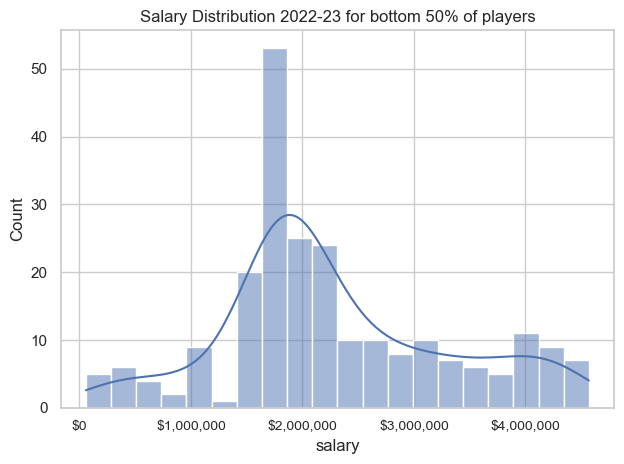

In [267]:
medianLess = df.query('salary <= salary.median()')

ax = sns.histplot(data = medianLess, x='salary', kde=True, bins = 20)
ax.set(title='Salary Distribution 2022-23 for bottom 50% of players')
plt.ticklabel_format(style='plain')
# Format x-axis ticks with dollar signs and commas
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
# Adjust x-axis tick font size
ax.xaxis.set_tick_params(labelsize=10)  # Adjust the font size as needed
plt.tight_layout()
plt.show()

This graph gives us a better look at things.  It appears that a large portion of the players earned between 1.5-2.5 million in 2022-23. A quick look at the NBA Veteran Minimum contract shows that the floor is set at 953,000 thousand for rookies, players with 10 years experience or more receive a minimum of 2.72 million, and everything inbetween for players with years of experience between that. This suggests that a lot of players are making close to their minimum based on what they can be paid by the league.

We are also interested in how the other half lives. Is there a specific range that stands out once you break in to the top 50% of earners within the league?

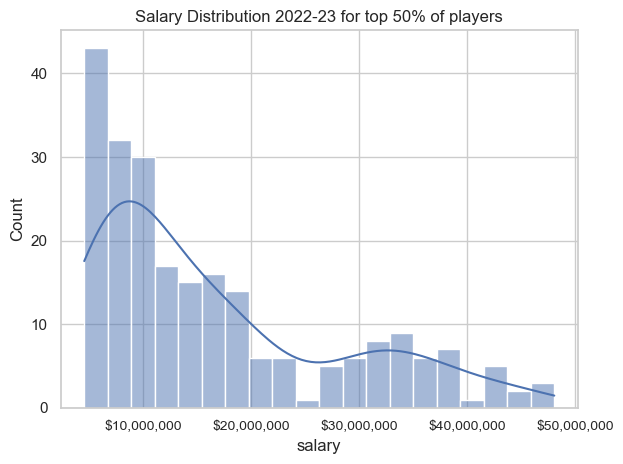

In [268]:
medianMore = df.query('salary > salary.median()')

ax = sns.histplot(data = medianMore, x='salary', kde=True, bins = 20)
ax.set(title='Salary Distribution 2022-23 for top 50% of players')
plt.ticklabel_format(style='plain')
# Format x-axis ticks with dollar signs and commas
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
# Adjust x-axis tick font size
ax.xaxis.set_tick_params(labelsize=10)  # Adjust the font size as needed
plt.tight_layout()
plt.show()

Indeed there is. Another large portion of the players seem to have made just short of &#36;10 million this year. From there we see as we saw before with a normal drop off and a dip back up at &#36;30-35 million.  The wealth certainly seems to be distributed towards the top players in the league.

Finally we'll create a boxplot for the salaries to get a different look at the range of salaries, along with a quick observation of any possible outliers.

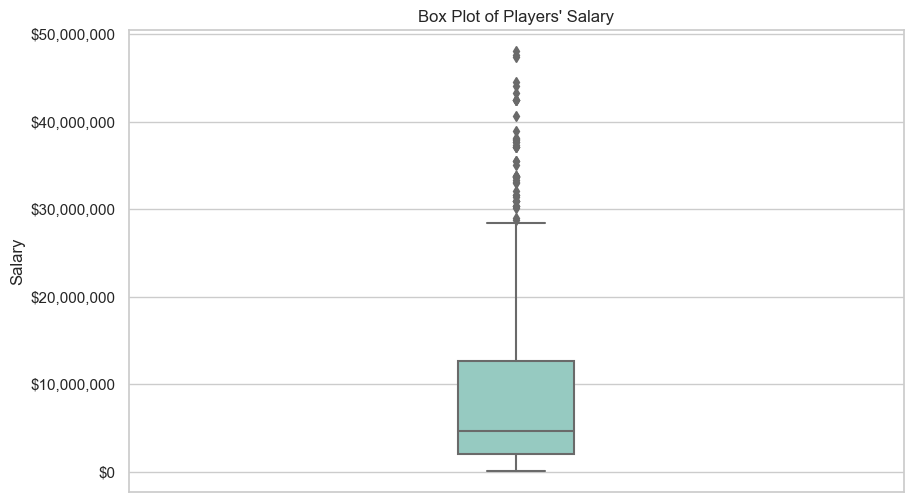

In [269]:
# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style="whitegrid")   # Set the style of the plot

# Create the box plot
ax = sns.boxplot(y="salary", data=df, palette="Set3", width=0.15)

# Add labels and title
plt.ylabel("Salary")
plt.title("Box Plot of Players' Salary")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"${int(x):,}"))


# Show the plot
plt.show()


So the boxplot identifies quite a few outliers actually. Later on we'll calculate what the exact value for an outlier has to exceed to qualify, but for now the boxplot shows that salaries larger than roughly \$28 million are outliers.  This makes sense, we can guess that most of those outlier salaries belong to star players, who are the exception not the norm.  We can begin to question the value of these salaries further down to see if these players are indeed earning their keep.  

### Bivariate and Multivariate Analysis:
Showcase relationships between variables using high-quality scatter plots, correlation matrices, and heatmaps. Highlight any significant correlations or patterns you observed.

Something we're immediately interested in if you're a player looking to increase your salary is correlation; what statistics are most closely associated with salary? We can create a heatmap for an "at a glance" view to see if anything sticks out right away.

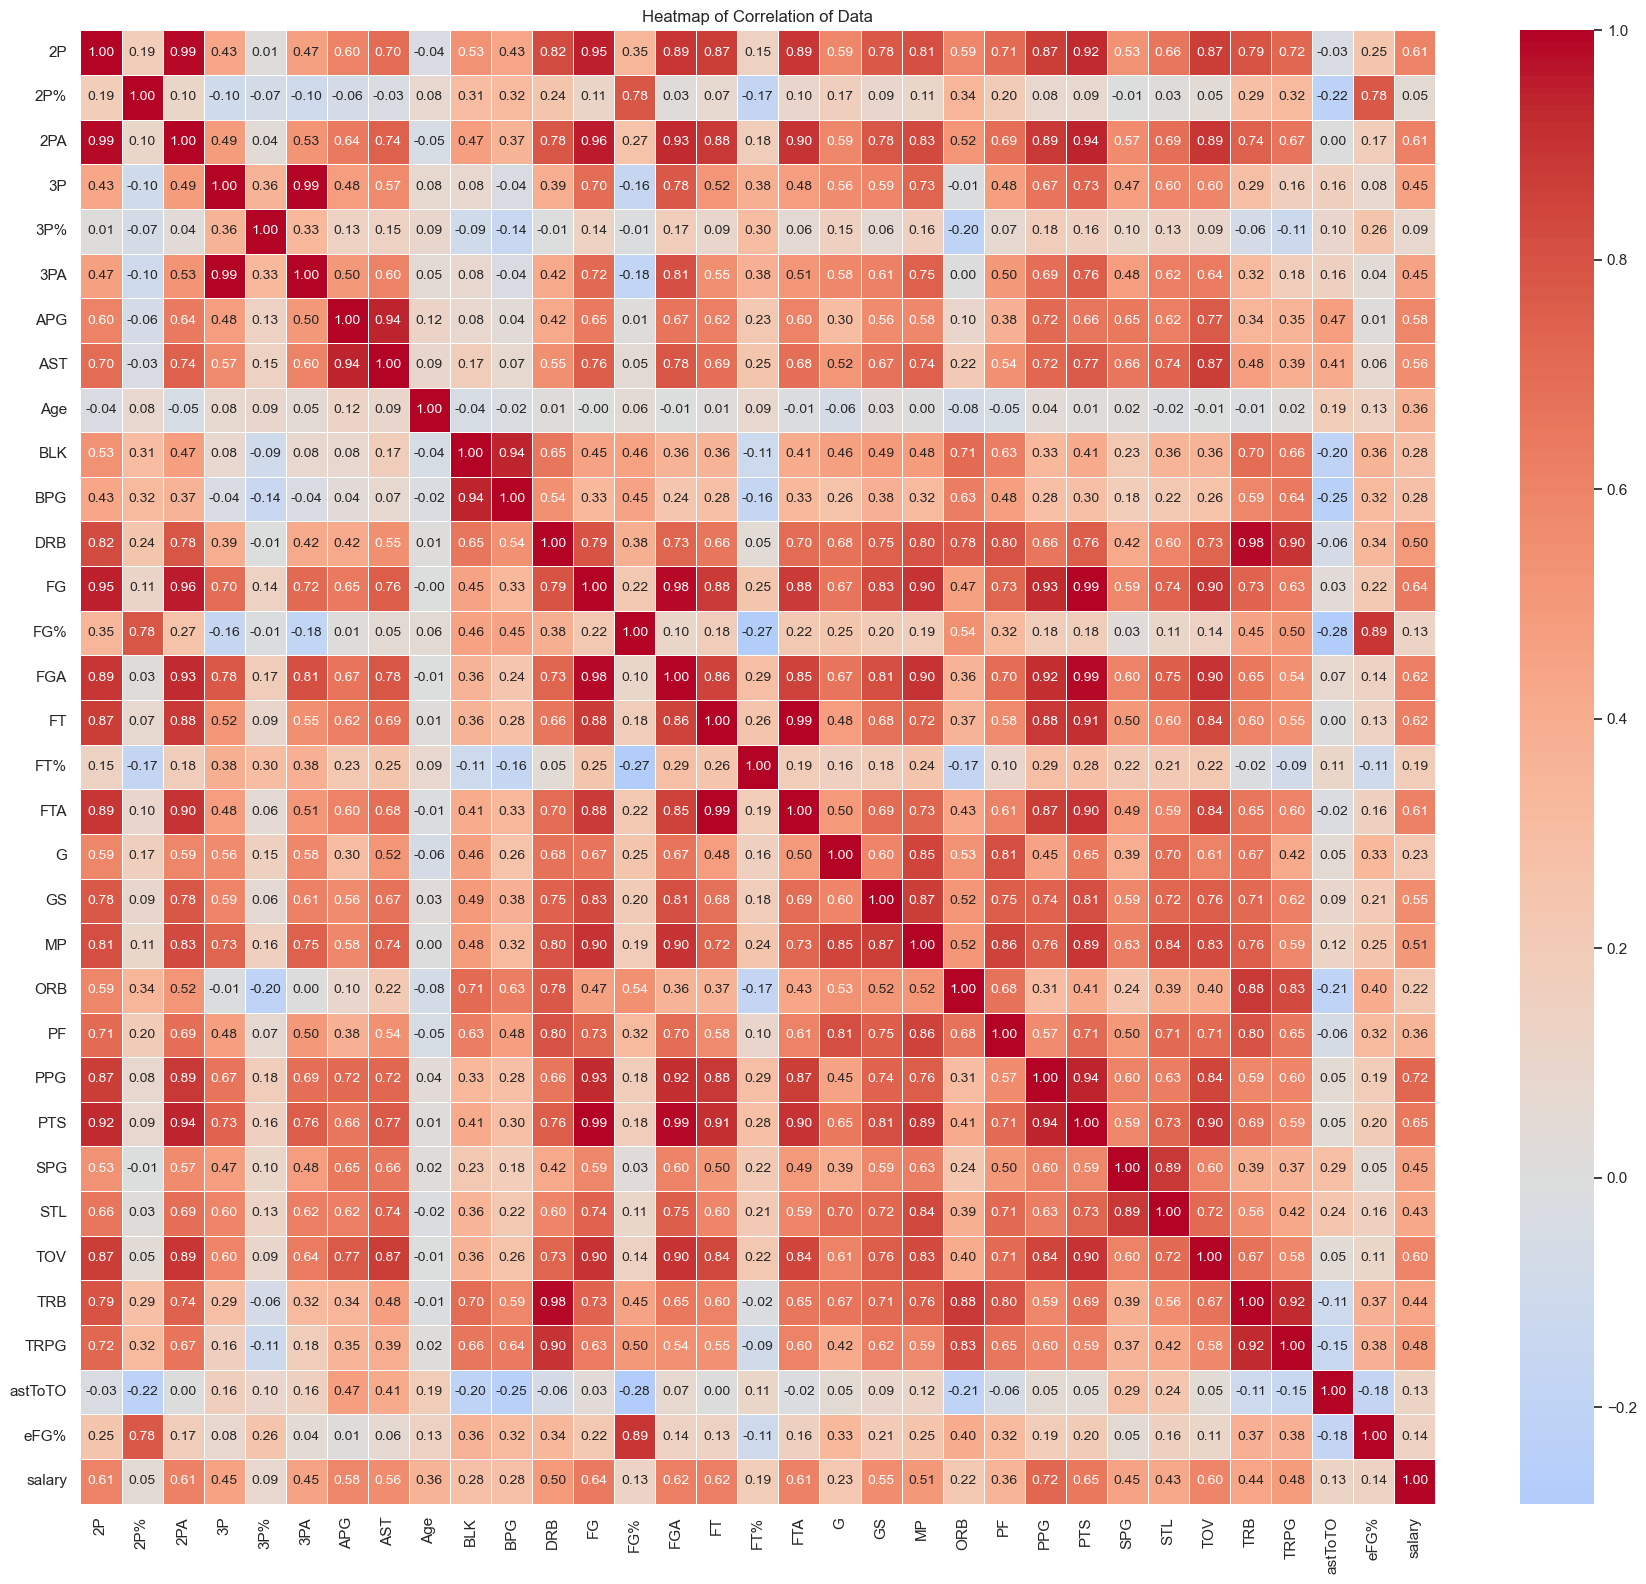

In [270]:
# Calculate the correlation matrix
correlation_matrix = df.drop(columns=['dollarPerMinute','dollarPerFG','dollarPerPoint'])
correlation_matrix = correlation_matrix.corr(numeric_only=True)

plt.figure(figsize=(18, 16))  # Set the figure size

# Create the heatmap of correlation matrix with improved layout
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            linewidths=0.5, annot_kws={"size": 10})

# Set title
plt.title("Heatmap of Correlation of Data")
plt.tight_layout()  # Improve layout
plt.show()



A quick run along the salary row shows us that the big winner is PPG, or points per game. This chart is a little much to analyze, so let's take a quick look at a scatterplot of Salary vs PPG and then we can get into some raw numbers.

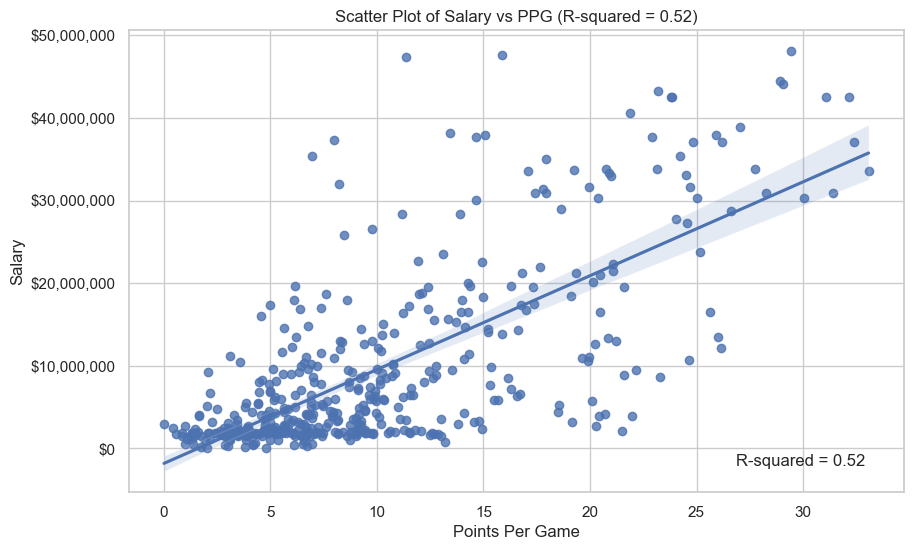

In [271]:
# Set the figure size and style of the plot
plt.figure(figsize=(10, 6))  
sns.set(style="whitegrid")   
# Create the scatter plot
scatter_plot = sns.regplot(x="PPG", y="salary", data=df)
# Calculate the linear regression parameters
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['PPG'], df['salary'])
r_squared = r_value ** 2
# Add labels and title
plt.xlabel("Points Per Game")
plt.ylabel("Salary")
plt.title("Scatter Plot of Salary vs PPG (R-squared = {:.2f})".format(r_squared))
# Customize legend
ax = scatter_plot.axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
# Display R-squared value on the plot
plt.text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment='right')
# Show the plot
plt.show()

As the heatmap showed, there's a moderate, positive correlation between salary and PPG, with an R-squared value of 0.52. While this graph helps visualize the relationship, it would be more insightful to have a look at some raw numbers.

In [285]:
# Get the top 5 correlations (descending) from the 'All' column
head = salaryCorr[['All']].head()
# Rename the 'All' column for the top 5 correlations
head.rename(columns={'All': 'Top 5 Correlation of Salary Descending'}, inplace=True)
# Apply styling to center align the data in the top 5 correlations
head = head.style.set_properties(**{'text-align': 'center'})

# Get the bottom 5 correlations (ascending) from the 'All' column
bottom5 = salaryCorr[['All']].tail().sort_values(by='All', ascending=True)
# Rename the 'All' column for the bottom 5 correlations
bottom5.rename(columns={'All': 'Top 5 Correlation of Salary Ascending'}, inplace=True)
# Apply styling to center align the data in the bottom 5 correlations
bottom5 = bottom5.style.set_properties(**{'text-align': 'center'})


side_by_side(head,bottom5)

,Top 5 Correlation of Salary Descending
PPG,0.722858
PTS,0.652559
FG,0.643683
FGA,0.623244
FT,0.621678
,Top 5 Correlation of Salary Ascending
2P%,0.053687
3P%,0.086511
dollarPerPoint,0.093077
dollarPerFG,0.107760


The 5 stats that correlate the most with salary are points per game, total points, field goals made, field goals attempted, and free throws made.  The 5 stats that matter the least to salary are assist to turnover ratio, dollar per field goal, dollar per point (both of these are columns created for this analysis), 3 point percentage, and finally 2 point percentage.

It seems that the late, great Bill Russell was correct, this game is about buckets.  It seems that it doesn't matter how you get your points, but so long as you get them, you will get paid.  This unfortunately validates the issues that many coaches and organizations have with getting young players to "play the right way" instead of trying to get their own shots up. The data show it, you score, you get paid.

Conversely, it's shocking that 3P% and 2P% are at the bottom of the list, given that the modern NBA is very analytics driven and places a heavy emphasis on the efficiency of the 3pt shot.  Perhaps shooting percentages have more to do with whether a team wins or not (which is a different analysis entirely), but win or lose the players get paid the same.

It's clear that points are king, but each position plays a very different role on the court. Could the salary for a Point Guard be determined differently from the salary for a Center? Let's have a look.

In [291]:
# Calculate the mean salary for each position and sort by descending mean salary
positionMean = df[['salary', 'Pos']].groupby(['Pos']).mean().sort_values(by='salary', ascending=False).round()
# Rename the 'salary' column to 'Mean Salary by Position'
positionMean.rename(columns={'salary': 'Mean Salary by Position'}, inplace=True)
# Format mean salary values as currency with commas
positionMean['Mean Salary by Position'] = positionMean['Mean Salary by Position'].apply(lambda x: f'${int(x):,}'.format(x))
# Apply center alignment styling to the mean salary DataFrame
positionMean = positionMean.style.set_properties(**{'text-align': 'center'})

# Calculate the median salary for each position and sort by descending median salary
positionMedian = df[['salary', 'Pos']].groupby(['Pos']).median().sort_values(by='salary', ascending=False).round()
# Rename the 'salary' column to 'Median Salary by Position'
positionMedian.rename(columns={'salary': 'Median Salary by Position'}, inplace=True)
# Format median salary values as currency with commas
positionMedian['Median Salary by Position'] = positionMedian['Median Salary by Position'].apply(lambda x: f'${int(x):,}'.format(x))
# Apply center alignment styling to the median salary DataFrame
positionMedian = positionMedian.style.set_properties(**{'text-align': 'center'})

side_by_side(positionMean, positionMedian)


,Mean Salary by Position
Pos,
PG,"$12,183,395"
PF,"$9,403,577"
C,"$9,338,676"
SG,"$8,495,827"
SF,"$8,278,663"
,Median Salary by Position
Pos,
PG,"$5,853,659"
PF,"$4,866,840"


**Top 5 Stats correlated with Salary Descending**

In [274]:
side_by_side(salaryCorr[['PG']].nlargest(5, 'PG'),
             salaryCorr[['SG']].nlargest(5, 'SG'),
             salaryCorr[['SF']].nlargest(5, 'SF'),
             salaryCorr[['PF']].nlargest(5, 'PF'), 
             salaryCorr[['C']].nlargest(5, 'C'))

,PG
PPG,0.663703
PTS,0.624945
FG,0.617011
APG,0.611871
TOV,0.607226
,SG
PPG,0.707760
PTS,0.660861
FGA,0.651549
FG,0.650419


Indeed, your criteria for financial success in the NBA *does* differ per position. PPG is weighed highest for every  

- **Point Guards** need to be sure to pass the rock... But also turn the ball over? Turnovers being a top 5 correlation with PG salary is curious.  We could assume that because the PG has the ball in their hands more than any other position, turnovers just come with the territory, but being that this is an analysis report we should explore it further later.

- **Shooting Guards** as expected are paid for their shooting. Klay Thompson once said "They pay me to shoot", and he indeed wasn't lying. Field Goal attempts are ranked 3rd above, even Field Goals made. Finally, the number of 3 point shot made rounds out the top 5, starting to show some of the importance of the 3 point shot in regards to salary. Intuitely this makes sense for the position, a shooting guard should be expected to score from all distances.

- **Small Forwards** seem to be asked to pass the ball and shoot inside the 3 point line to earn their pay.  Scottie Pippen of the Chicago Bulls in the 90s revolutionized the 'Point Forward' position, and it seems in 2022-23 the NBA has rewarded the players who are able to continue to further the role.  Players such as LeBron James and Giannis Antetokounmpo are known for their interior scoring and passing, but it seems many more small forwards are following their lead.

- **Power Forwards**' salaries are weighted even heavier on assists per game than small forwards, albeit only slightly.  Over the years the power forward position has undergone a transformation to move away from post play and become more of a wing like the small forward, this seems to reflect that. Oddly enough, power forward is the only position that has free throws made as a top 5 category.  In years gone by bigger players usually struggled from the free throw line, and this was used as a tactic to slow down these bigger players from scoring.  All 'big men' players that want to earn more should be looking at this and immediately getting in the gym and working on their free throws. Free throws, as the name implies, are free money if you make them.

- **Center** is all about scoring, with a *weighty* .81 salary to PPG correlation. Total points, field goals attempted, and 2 points attempted all being in the top 5 tells us that it was important to just shoot as much as you could.  A weighting this heavy on scoring signifies to us that any Center that is being paid well *without* scoring is worth further investigation.

### Outlier Detection:
 Discuss any outliers you discovered and their potential impact on the analysis. Provide visual evidence, such as scatter plots with marked outliers.

Recall our boxplot from the univariate analysis section.

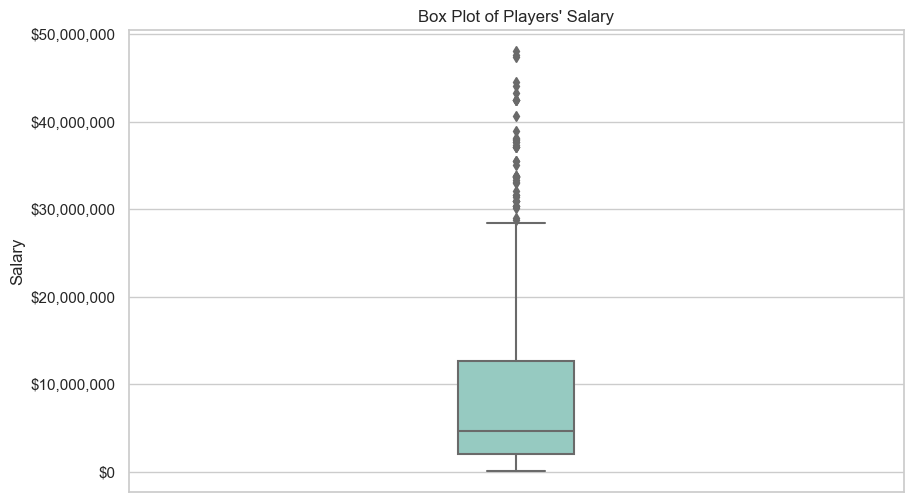

In [275]:
# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style="whitegrid")   # Set the style of the plot

# Create the box plot
ax = sns.boxplot(y="salary", data=df, palette="Set3", width=0.15)

# Add labels and title
plt.ylabel("Salary")
plt.title("Box Plot of Players' Salary")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"${int(x):,}"))

# Show the plot
plt.show()


This graph indicated that any salary larger than roughly \$28 million was an outlier. Here we will computer the outlier value for ourselves and compare it, along with have a look at any and all players that are considered outliers.

In [276]:
outlier = df['salary'].mean() + 3 * df['salary'].std()
print(f'${outlier:,.2f}')

$41,912,145.54


Our calculation of an outlier has a much higher value, putting the threshold at a salary greater than \$41.9 million.  Intuitively that probably makes more sense, since the distribution showed us there was actually a jump in the number of salaries in the \$30 million range.

Lets look at the players that have salaries considered to be outliers and see if there's anything we can identify about them.

In [277]:
outliers['salary'] = outliers['salary'].apply(lambda x: '${:,.0f}'.format(x))
outliers[['salary', 'PPG', 'Age', 'Pos']].sort_values(by=['salary', 'PPG'], ascending=False).round({'PPG':1})

C:\Users\Ryan\AppData\Local\Temp\ipykernel_11252\2053797099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['salary'] = outliers['salary'].apply(lambda x: '${:,.0f}'.format(x))


,salary,PPG,Age,Pos
Player,,,,
Stephen Curry,"$48,070,014",29.4,34,PG
Russell Westbrook,"$47,559,433",15.9,34,PG
John Wall,"$47,345,760",11.4,32,PG
LeBron James,"$44,474,988",28.9,38,PF
Kevin Durant,"$44,119,845",29.1,34,PF
Bradley Beal,"$43,279,250",23.2,29,SG
Damian Lillard,"$42,492,492",32.2,32,PG
Giannis Antetokounmpo,"$42,492,492",31.1,28,PF
Kawhi Leonard,"$42,492,492",23.8,31,SF


Some notable observations of the outliers:
- Of the 10 outliers, 4 of them are point guards. This helps explain why the point guard mean salary is so high compared to the other positions. 
- 8 players are over the age of 30, with LeBron James being the oldest at 38. This is encouraging for younger players hoping to be able to earn as they age over time.
- 2 of these players, Russell Westbrook and John Wall, have a much lower PPG than the others. They are both over 30, so it's possible that these players are near the end of a max contract they signed back in their "prime", or perhaps they got injured and haven't been able to play relative to their earnings.
- There are no Centers in the list of outliers. The Center position had the 3rd highest mean salary and the 4th highest median salary.

### Categorical Variables:
Use visually appealing bar charts or pie charts to demonstrate the distribution of categorical variables and any relationships between them.

In [278]:
max_salary_indices = df.groupby('Age')['salary'].idxmax()
max = df.loc[max_salary_indices, ['Age', 'salary', 'Tm']]
max['salary'] = max['salary'].apply(lambda x:'{:,}'.format(x))

min_salary_indices = df.groupby('Age')['salary'].idxmin()
min = df.loc[min_salary_indices, ['Age', 'salary','Tm']]
min['salary'] = min['salary'].apply(lambda x:'{:,}'.format(x))

side_by_side(min, max)

,Age,salary,Tm
Player,,,
Max Christie,19,"1,017,781",LAL
Jaden Hardy,20,"1,017,781",DAL
Brandon Boston Jr.,21,"1,563,518",LAC
Christian Koloko,22,"1,500,000",TOR
Stanley Umude,23,"58,493",DET
Jordan Goodwin,24,"900,000",WAS
Anthony Lamb,25,"253,254",GSW
Alize Johnson,26,"192,293",SAS
Xavier Cooks,27,"140,384",WAS


In [279]:
result = pd.concat([min, max])

result = result.sort_values(by='Age')

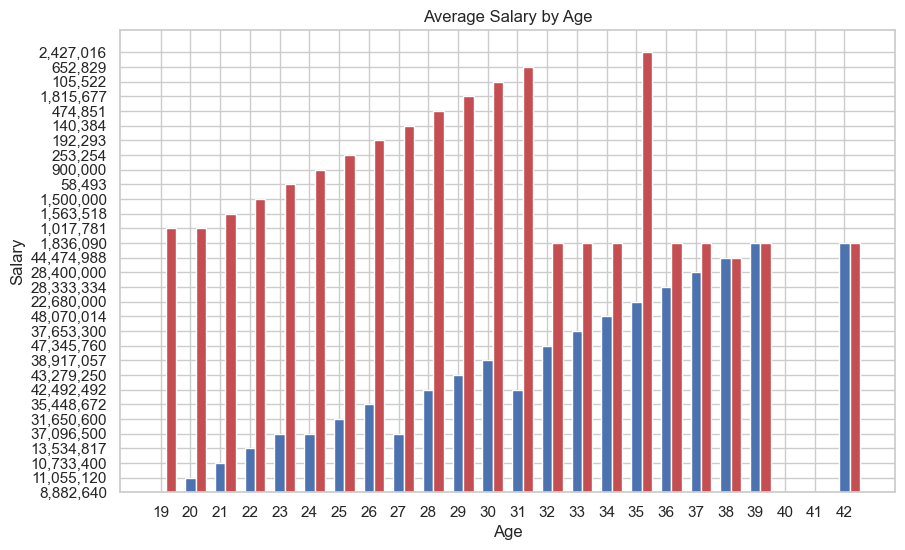

In [280]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
plt.bar(max['Age'], max['salary'], width=bar_width, label='Highest Salary', color='b')
plt.bar(min['Age'] + bar_width, min['salary'], width=bar_width, label='Lowest Salary', color='r')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Average Salary by Age')
plt.xticks(range(19, 43))
plt.show()

## Key Findings

Summarize the most critical insights from your analysis. Emphasize how these findings relate to the initial research questions and their implications for decision-making.

## Recommendations and Next Steps:
Provide actionable recommendations based on your findings. If your EDA has strategic implications, outline potential courses of action and their expected outcomes. Discuss possible follow-up analyses or data collection efforts.

Further research could delve into predictive modeling to forecast player salaries, incorporating additional variables for a more comprehensive understanding of this captivating aspect of professional sports

## Limitations:  
The dataset used for this analysis was gathered from https://www.basketball-reference.com/, and some salary numbers were cross referenced with https://hoopshype.com/.  

Due to the NBA having G-League 2 way contracts, 10 day contracts, contract waiving, and other such things it is very difficult to get a salary dataset for *every* player to see the floor for a season.  As such, this is just a (large) sample of the true population. In order to conduct any useful analysis, players that had stats recorded for the season on basketball-reference, but did not have a salary recorded on the website for the season were removed from the dataset.  Although it is sad to say, but if your salary wasn't recorded on basketball reference, your statistical impact probably wasn't significant either.

These salary numbers were pulled for the start of the season, therefore any buyouts, contract negotations, or anything of the sort are not reflected. In the example of buy outs, players and their team can choose to pay out the contract to release the player, but perhaps at a price less than what they are fully owed.  These numbers are not made public so it would be impossible to tally their true earnings for the season, which is I've chosen to just work with the salary numbers dictated in their contract for simplicity.

## Conclusion:
Wrap up the report by reiterating the importance of the analysis and summarizing its main contributions to the business objectives.

This exploratory analysis of the stats and salaries for the NBA 2022-23 roster provides valuable insights. Through the use of tables, graph visualization, and statistical calculations we have identified trends and patterns around the factors that influenced player salary for the season.

The analysis displayed a staggering variety of salaries, going as low as roughly \$60,000 a year all the way up to \$48 million per year.  Such a large disparity eventually showed us that the distribution was heavily skewed to the right, with the superstar salaries dragging the mean salary up to \$9.5 million while the median salary ended up being less than half at about \$4.5 million.

Salary averages varied by position as well, with the Point guard being the leader with a median salary of \$5.8 million, and the Small Forward bringing up the rear at \$3.5 million. Because of the heavily skewed distribution, the mean salary for each position was roughly double that of the median.

Points per game was the king statistic, leading the way with a .72 positive correlation with salary, showing that if you want to get paid you need to score the ball.  While PPG remained constant at \#1, each position had different top 5 metrics that were associated with salary.  Point Guards, Small Forwards, and surprisingly Power forwards all had Assists per Game as a top 5 stat.  Meanwhile Shooting Guards and Centers valued Field Goal Attempts, showing that efficiency wasn't enough, you have to be shooting in volume to get paid. 

Stats that seemed to matter less with regards to salary were some things like a player's age, their efficiency, and number of games played.  It seems that NBA players are able to take care of their bodies better and play at a higher level later into their careers, which might suggest why age doesn't matter so much.  While the NBA talks at length about efficiency, it seems efficiency matters less than may have been thought with regards to salary.  If a young player wants to get paid for their next contract, it seems going to a team where they can take more shots would be beneficial to playing on a team where less shots are available. 

It's important to remember that this is an exploratory analysis, no predictive models were built or used for predicting future values. One must always remember that correlation does not imply causation, and that there are numerous factors that can influence salary that are not present in this dataset or cannot be quantified.  Despite these caveats, this report serves as an excellent foundation for exploring and making informed decisions with regards to NBA salary.

## Visual Appendices:
Include well-labeled, high-quality visualizations in the appendices. Reference these visuals in the main body of the report.

In [281]:
side_by_side(salaryCorr[['PG']].sort_values(by='PG', ascending= False).tail(),salaryCorr[['SG']].sort_values(by='SG', ascending= False).tail(),salaryCorr[['SF']].sort_values(by='SF', ascending= False).tail(),salaryCorr[['PF']].sort_values(by='PF', ascending= False).tail(), salaryCorr[['C']].sort_values(by='C', ascending= False).tail())

,PG
2P%,0.283388
G,0.232153
FT%,0.193964
3P%,0.040985
astToTO,0.021931
,SG
FT%,0.142300
dollarPerFG,0.056047
2P%,0.033498
dollarPerPoint,0.026554


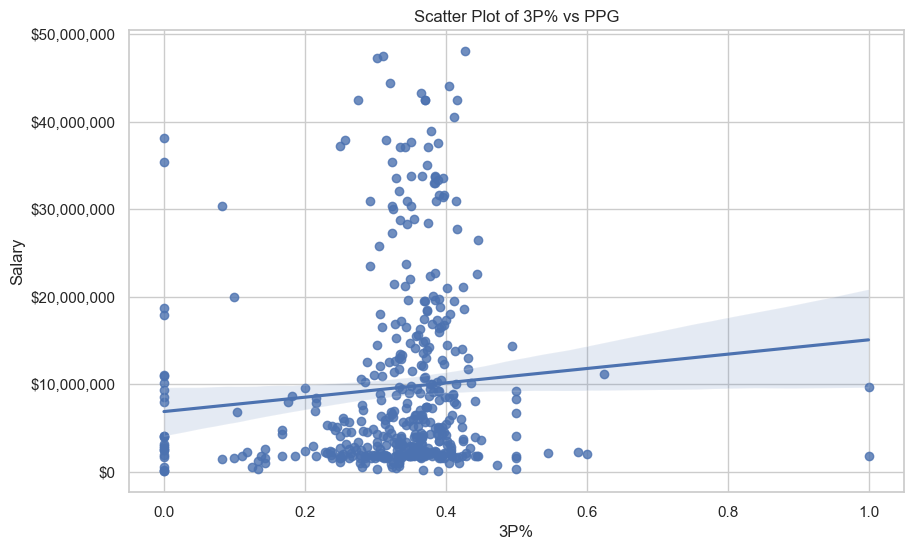

In [282]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style="whitegrid")   # Set the style of the plot

# Create the scatter plot
scatter_plot = sns.regplot(x="3P%", y="salary", data=df)

# Add labels and title
plt.xlabel("3P%")
plt.ylabel("Salary")
plt.title("Scatter Plot of 3P% vs PPG")

# Customize legend
ax = scatter_plot.axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
# Show the plot
plt.show()


## References:
Provide references to any external sources you used for analysis techniques, domain knowledge, or concepts.

basketball reference, hoops hype

In [283]:
df.loc[['Kevin Durant']]['Age']

Player
Kevin Durant    34
Name: Age, dtype: int64

In [284]:
#age = sa.df['Age'].rank(method='first', ascending= False) creates a rank for the age column and sorts oldest to youngest
#age.loc[['LeBron James']] returns 3, so lebron is the 3rd oldest player in the dataset.